In [4]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

# Figure Parameter

In [5]:
speeds = [0.27,0.81,1.62,3.24,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
speeds = [0.14,0.42,0.7,0.98,1.96]


In [9]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3
figsize = (16,8)

save = False
save_name = "Figure 1"
show = True
image_format = "png"
dpi = 300

In [11]:
data4 = []
cell = 150
net = f'reciprocal_ff_fitted_cell_431/wBA/wBA_0.0'

for s in speeds: 
    print(s)
    fp = f'/Users/simoneebert/Documents/Simulations/motion_anticipation_network/Loops/{net}/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data4.append([time,out['RG'][:]])

    if s == 0.14:
        outd4 = out

0.14
0.42
0.7
0.98
1.96


In [5]:
s = 1.0
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp7 = pickle.load(handle)   
    
with open(f'{fp}/out', 'rb') as handle:
    params7 = pickle.load(handle)   

fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd7 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp8 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd8 = pickle.load(handle)  


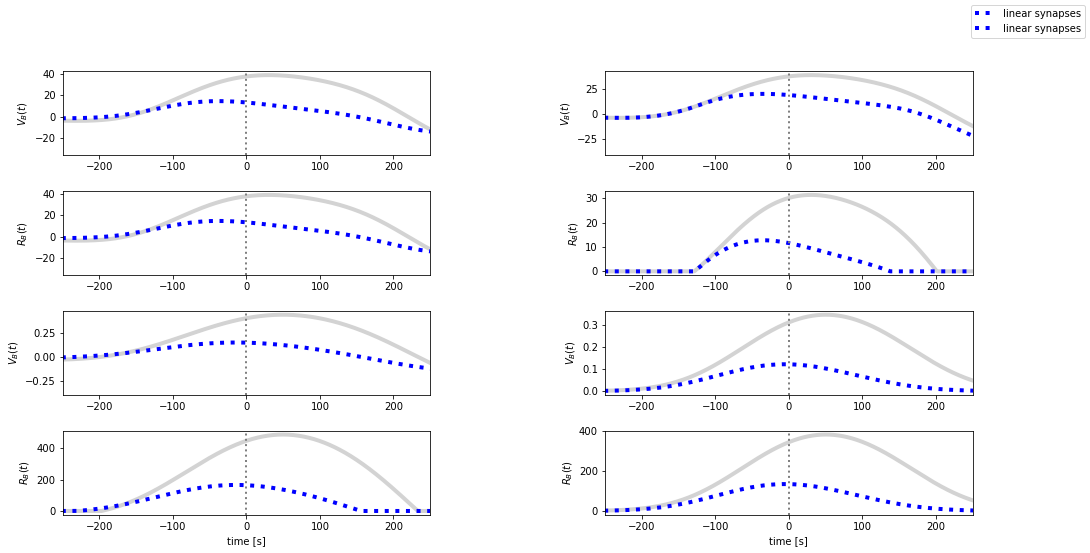

In [6]:
c = 'green'
cbar = 'grey'

#initialize figure
nrows = 4
ncols = 2

fig = plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)
#fig.tight_layout()


#TODO adjustment
fig.subplots_adjust(top=0.88,
bottom=0.11,
left=0.11,
right=0.9,
hspace=0.425,
wspace=0.475)
c1 = 'green'
c2 = 'blue'



# rectified
ax = fig.add_subplot(gs[0,1])

ax.plot(data4[-1][0],outdp8['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0],outd8['VB'][50,:], color = c2, linewidth = lw, linestyle = ':', label = 'linear synapses')

ax.set_ylabel('$V_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[1,1], sharex = ax)

ax.plot(data4[-1][0],outdp8['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd8['RB'][50,:], color = c2, linewidth = lw, linestyle = ':')

ax.set_ylabel('$R_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[2,1], sharex = ax)

ax.plot(data4[-1][0],outdp8['VG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0],outd8['VG'][:], color = c2, linewidth = lw, linestyle = ':')

ax.set_ylabel('$V_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[3,1], sharex = ax)

ax.plot(data4[-1][0],outdp8['RG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd8['RG'][:], color = c2, linewidth = lw, linestyle = ':')

ax.set_ylabel('$R_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax.set_xlabel ('time [s]')



ax.set_xlim(-250,250)

# linear
ax = fig.add_subplot(gs[0,0])

ax.plot(data4[-1][0],outdp7['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0],outd7['VB'][50,:], color = c2, linewidth = lw, linestyle = ':', label = 'linear synapses')

ax.set_ylabel('$V_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[1,0], sharex = ax)

ax.plot(data4[-1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RB'][50,:], color = c2, linewidth = lw, linestyle = ':')

ax.set_ylabel('$R_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[2,0], sharex = ax)

ax.plot(data4[-1][0],outdp7['VG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0],outd7['VG'][:], color = c2, linewidth = lw, linestyle = ':')

ax.set_ylabel('$V_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[3,0], sharex = ax)

ax.plot(data4[-1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RG'][:], color = c2, linewidth = lw, linestyle = ':')

ax.set_ylabel('$R_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax.set_xlabel ('time [s]')


ax.set_xlim(-250,250)


fig.legend()



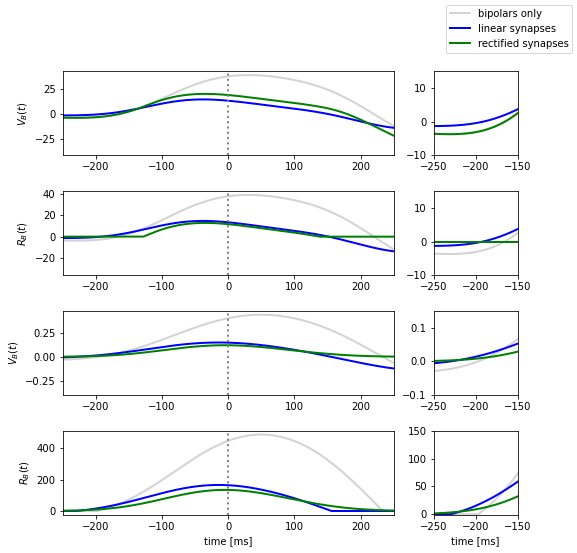

In [7]:
c = 'green'
cbar = 'grey'
lw = 2
#initialize figure
nrows = 4
ncols = 4
figsize = (8,8)
fig = plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)
#fig.tight_layout()


#TODO adjustment
fig.subplots_adjust(top=0.88,
bottom=0.11,
left=0.11,
right=0.9,
hspace=0.425,
wspace=0.475)
c1 = 'green'
c2 = 'blue'





ax.set_xlim(-250,250)

# linear
ax = fig.add_subplot(gs[0,0:3])

ax.plot(data4[-1][0],outdp7['VB'][50,:], color = 'lightgrey', linewidth = lw, label = 'bipolars only')
ax.plot(data4[-1][0],outd7['VB'][50,:], color = c2, linewidth = lw, label = 'linear synapses')
ax.plot(data4[-1][0],outd8['VB'][50,:], color = c1, linewidth = lw, label = 'rectified synapses')

ax.set_ylabel('$V_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[1,0:3], sharex = ax)

ax.plot(data4[-1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RB'][50,:], color = c2, linewidth = lw)
ax.plot(data4[-1][0], outd8['RB'][50,:], color = c1, linewidth = lw)

ax.set_ylabel('$R_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[2,0:3], sharex = ax)

ax.plot(data4[-1][0],outdp7['VG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0],outd7['VG'][:], color = c2, linewidth = lw)
ax.plot(data4[-1][0],outd8['VG'][:], color = c1, linewidth = lw)

ax.set_ylabel('$V_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[3,0:3], sharex = ax)

ax.plot(data4[-1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RG'][:], color = c2, linewidth = lw)
ax.plot(data4[-1][0], outd8['RG'][:], color = c1, linewidth = lw)

ax.set_ylabel('$R_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax.set_xlabel ('time [ms]')


ax.set_xlim(-250,250)





# zoom
ax = fig.add_subplot(gs[0,3])

ax.plot(data4[-1][0],outdp7['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0],outd7['VB'][50,:], color = c2, linewidth = lw)
ax.plot(data4[-1][0],outd8['VB'][50,:], color = c1, linewidth = lw)

ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax.set_ylim(-10,15.0)

ax = fig.add_subplot(gs[1,3], sharex = ax)

ax.plot(data4[-1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RB'][50,:], color = c2, linewidth = lw)
ax.plot(data4[-1][0], outd8['RB'][50,:], color = c1, linewidth = lw)

ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax.set_ylim(-10,15.0)

ax = fig.add_subplot(gs[2,3], sharex = ax)

ax.plot(data4[-1][0],outdp7['VG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0],outd7['VG'][:], color = c2, linewidth = lw)
ax.plot(data4[-1][0],outd8['VG'][:], color = c1, linewidth = lw)

ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax.set_ylim(-0.1,0.150)


ax = fig.add_subplot(gs[3,3], sharex = ax)

ax.plot(data4[-1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RG'][:], color = c2, linewidth = lw)
ax.plot(data4[-1][0], outd8['RG'][:], color = c1, linewidth = lw)

ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax.set_xlabel ('time [ms]')


ax.set_xlim(-250,-150)
ax.set_ylim(-1,150)


fig.legend()



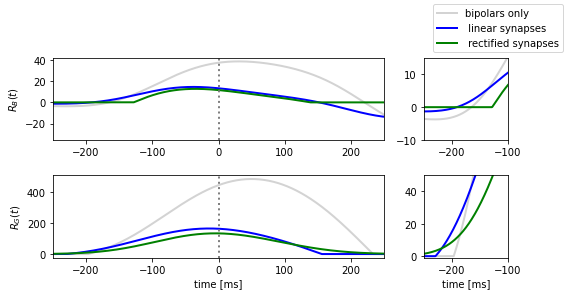

In [8]:
c = 'green'
cbar = 'grey'
lw = 2
#initialize figure
nrows = 2
ncols = 4
figsize = (8,4)
fig = plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)
#fig.tight_layout()


#TODO adjustment
fig.subplots_adjust(top=0.805,
bottom=0.11,
left=0.11,
right=0.9,
hspace=0.425,
wspace=0.475)
c1 = 'green'
c2 = 'blue'






# linear
ax = fig.add_subplot(gs[0,0:3])


ax.plot(data4[-1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw, label = 'bipolars only')
ax.plot(data4[-1][0], outd7['RB'][50,:], color = c2, linewidth = lw, label = ' linear synapses')
ax.plot(data4[-1][0], outd8['RB'][50,:], color = c1, linewidth = lw, label = ' rectified synapses')

ax.set_ylabel('$R_{B}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax = fig.add_subplot(gs[1,0:3], sharex = ax)


ax.plot(data4[-1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RG'][:], color = c2, linewidth = lw)
ax.plot(data4[-1][0], outd8['RG'][:], color = c1, linewidth = lw)

ax.set_ylabel('$R_{G}(t)$')
ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax.set_xlabel ('time [ms]')


ax.set_xlim(-250,250)





# zoom
ax = fig.add_subplot(gs[0,3])

ax.plot(data4[-1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RB'][50,:], color = c2, linewidth = lw)
ax.plot(data4[-1][0], outd8['RB'][50,:], color = c1, linewidth = lw)

ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax.set_ylim(-10,15.0)
ax.set_xlim(-250,-150)

ax = fig.add_subplot(gs[1,3], sharex = ax)


ax.plot(data4[-1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax.plot(data4[-1][0], outd7['RG'][:], color = c2, linewidth = lw)
ax.plot(data4[-1][0], outd8['RG'][:], color = c1, linewidth = lw)

ax.axvline(0,linestyle = ':', color = 'grey', linewidth =2 )

ax.set_xlabel ('time [ms]')


ax.set_xlim(-250,-100)
ax.set_ylim(-1,50)


fig.legend()

